In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

Read dataset

In [76]:
data= pd.read_excel('dt_1 (1).xlsx')

Data Preprocessing

In [77]:
df_feature = data.drop("الاضطراب",axis=1)
df_target = data["الاضطراب"]
X = pd.get_dummies(df_feature,drop_first=True)
y = pd.get_dummies(df_target)

Split data

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

implement using keras

In [79]:
import keras

In [80]:
input_shape = X_train.shape[1]
print(input_shape)

35


Build The model

In [81]:
# Build The structure of Model
model = keras.Sequential()
# here we define 20 nodes with input shape 35 and activation function called relu
model.add(keras.layers.Dense(20, input_shape=(input_shape,), activation='relu'))
#then the output 3 node because we have multiclassifiaction (anxity/ desperation /OCD) 
#and the activation function called softmax
model.add(keras.layers.Dense(3, activation='softmax'))

In [82]:
#compile the model
optimizer = keras.optimizers.Adam(lr=0.5)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

Train model

Epoch 1/20
7/7 [==============================] - 0s 20ms/step - loss: 1.2371 - accuracy: 0.2817 - val_loss: 1.0997 - val_accuracy: 0.4565
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 1.1176 - accuracy: 0.3474 - val_loss: 0.9926 - val_accuracy: 0.5543
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 1.0123 - accuracy: 0.5164 - val_loss: 0.8985 - val_accuracy: 0.6413
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.9193 - accuracy: 0.6056 - val_loss: 0.8138 - val_accuracy: 0.6739
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.8357 - accuracy: 0.6291 - val_loss: 0.7366 - val_accuracy: 0.6848
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7597 - accuracy: 0.6432 - val_loss: 0.6654 - val_accuracy: 0.7065
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.7277 - val_loss: 0.6038 - val_accuracy: 0.8370
Epoch 8/20
7/7 [=================

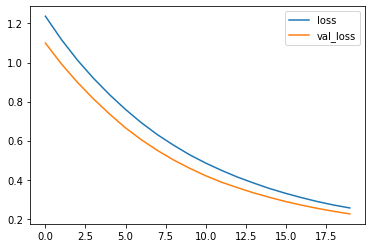

In [74]:
history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_test, y_test),
          verbose=1)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [63]:
training_loss, accuracy1 = model.evaluate(X_train, y_train)
testing_loss, accuracy2 = model.evaluate(X_test, y_test)
print("The training loss = {:2f}, and the accuracy = {:2f}" .format(training_loss, accuracy1))
print("The testing loss = {:2f}, CNN Test Set Accuracy: {:2f}" .format(testing_loss, accuracy2))

3/3 [==============================] - 0s 666us/step - loss: 0.9148 - accuracy: 0.5000
The training loss = 1.006294, and the accuracy = 0.446009
The testing loss = 0.914809, CNN Test Set Accuracy: 0.500000


Text(0.5, 1.0, 'CNN Confusion_matrix')

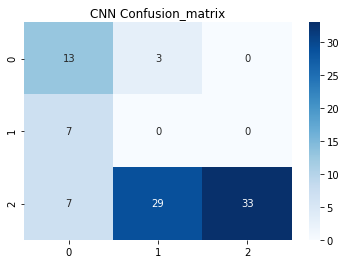

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
from matplotlib.colors import ListedColormap
import seaborn as sns
y_pred = model.predict(X_test)
y_pred = np.asarray(y_pred).argmax(axis=1)
y_test= np.asarray(y_test).argmax(axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
confusion = confusion_matrix(y_pred, y_test)
sns.heatmap(confusion,annot=True,cmap="Blues")
plt.title('CNN Confusion_matrix')

In [65]:
model.save('saber.h5')